In [1]:
# Import packages
import os
import glob

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import rasterio
import xarray

import pandas as pd

In [2]:
# Define filepath
filepath = '/Users/jimwy/OneDrive/Documents/FutureOfCoffee/'

#xds = xarray.open_dataset(filepath + '*.nc', decode_coords='all')

# Define list of Landsat bands
files = sorted(glob.glob(filepath + 'ESA_10.nc'))
print(files)

['/Users/jimwy/OneDrive/Documents/FutureOfCoffee/ESA_10.nc']


In [3]:
import rasterio as rio
cclim = xarray.open_dataset(files[0], engine='rasterio') # , decode_times = False

In [4]:
cclim_lst = []

for i in range(0, len(files)):
    cclim_lst.append(xarray.open_dataset(files[i], engine='rasterio'))

In [5]:
cclim

<xarray.Dataset>
Dimensions:      (y: 137, x: 233, time: 132)
Coordinates:
  * y            (y) float64 32.0 31.75 31.5 31.25 ... -1.25 -1.5 -1.75 -2.0
  * x            (x) float64 -117.0 -116.8 -116.5 -116.2 ... -59.5 -59.25 -59.0
  * time         (time) object 2011-01-01 00:00:00 ... 2021-12-01 00:00:00
    spatial_ref  int32 ...
Data variables:
    t2m          (time, y, x) float32 ...
    tp           (time, y, x) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-03-04 18:52:52 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

In [6]:
t2mf = (cclim['t2m'] - 273.15) * 9/5 + 32

In [7]:
cclim['tp']


<xarray.DataArray 'tp' (time: 132, y: 137, x: 233)>
[4213572 values with dtype=float32]
Coordinates:
  * y            (y) float64 32.0 31.75 31.5 31.25 ... -1.25 -1.5 -1.75 -2.0
  * x            (x) float64 -117.0 -116.8 -116.5 -116.2 ... -59.5 -59.25 -59.0
  * time         (time) object 2011-01-01 00:00:00 ... 2021-12-01 00:00:00
    spatial_ref  int32 0
Attributes:
    long_name:  Total precipitation
    units:      ('m', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', ...

In [8]:
t2mf

<xarray.DataArray 't2m' (time: 132, y: 137, x: 233)>
array([[[57.571667, 56.316315, 55.046898, ..., 65.08055 , 65.11983 ,
         65.18338 ],
        [57.54365 , 56.41162 , 55.67691 , ..., 65.29555 , 65.3273  ,
         65.38992 ],
        [57.504375, 57.07624 , 56.13026 , ..., 65.51709 , 65.545105,
         65.58064 ],
        ...,
        [72.96983 , 72.977356, 72.980156, ..., 78.11379 , 76.86871 ,
         76.72474 ],
        [73.125015, 73.127815, 73.125015, ..., 78.45124 , 77.45198 ,
         76.535   ],
        [73.27926 , 73.297005, 73.289536, ..., 77.575356, 77.45571 ,
         76.78082 ]],

       [[55.026356, 53.462505, 51.4341  , ..., 64.08969 , 64.13177 ,
         64.17758 ],
        [55.32546 , 53.905586, 52.520264, ..., 64.35331 , 64.399124,
         64.44493 ],
        [55.417084, 54.836567, 53.360607, ..., 64.61034 , 64.65614 ,
         64.69449 ],
...
        [71.01811 , 71.01058 , 71.02838 , ..., 79.42056 , 77.85204 ,
         77.63803 ],
        [71.253654, 71.246185, 71.253654, ..., 80.000145, 78.586754,
         77.56789 ],
        [71.481735, 71.481735, 71.50321 , ..., 78.45311 , 78.50639 ,
         77.81749 ]],

       [[57.60254 , 55.464764, 52.360413, ..., 69.586975, 69.53743 ,
         69.516884],
        [58.924248, 56.948193, 53.657845, ..., 69.86086 , 69.83285 ,
         69.81879 ],
        [58.99061 , 58.354992, 55.506786, ..., 70.12541 , 70.11135 ,
         70.12168 ],
        ...,
        [72.94462 , 72.97263 , 72.99696 , ..., 78.85411 , 77.532394,
         77.360405],
        [73.08854 , 73.13435 , 73.16989 , ..., 79.35327 , 78.11286 ,
         77.191216],
        [73.218506, 73.27459 , 73.320404, ..., 78.0493  , 78.0493  ,
         77.46599 ]]], dtype=float32)
Coordinates:
  * y            (y) float64 32.0 31.75 31.5 31.25 ... -1.25 -1.5 -1.75 -2.0
  * x            (x) float64 -117.0 -116.8 -116.5 -116.2 ... -59.5 -59.25 -59.0
  * time         (time) object 2011-01-01 00:00:00 ... 2021-12-01 00:00:00
    spatial_ref  int32 0

In [129]:
#tp2 = cclim['tp'].sum(axis = 0)/11
tp2 = cclim['tp'].mean(axis = 0)/11

In [130]:
tp2

<xarray.DataArray 'tp' (y: 137, x: 233)>
array([[5.70256525e-05, 7.72982312e-05, 8.03339935e-05, ...,
        3.47346358e-04, 3.44417058e-04, 3.41311621e-04],
       [5.17693697e-05, 6.95811468e-05, 7.10696477e-05, ...,
        3.37455102e-04, 3.35062563e-04, 3.32211173e-04],
       [4.93494808e-05, 5.64425027e-05, 5.96817590e-05, ...,
        3.26601177e-04, 3.25553847e-04, 3.24933731e-04],
       ...,
       [9.81102276e-05, 9.88913307e-05, 9.59211320e-05, ...,
        7.79325317e-04, 6.87039632e-04, 6.28532318e-04],
       [1.04591454e-04, 1.06084088e-04, 1.03377439e-04, ...,
        7.67773716e-04, 6.80577417e-04, 6.69543340e-04],
       [1.16715419e-04, 1.16206029e-04, 1.15657080e-04, ...,
        7.43931159e-04, 6.76723721e-04, 6.56642253e-04]], dtype=float32)
Coordinates:
  * y            (y) float64 32.0 31.75 31.5 31.25 ... -1.25 -1.5 -1.75 -2.0
  * x            (x) float64 -117.0 -116.8 -116.5 -116.2 ... -59.5 -59.25 -59.0
    spatial_ref  int32 0

In [131]:
#ideal temperature range 64°–70°F - can tolerate mean annual temperatures up to roughly 73°F
#ideal precipitation annual rainfall range of 1500 to 3000 mm, 60 - 90 inches

#t2mf_mask = t2mf.where((t2mf > 64) & (t2mf <= 70))
t2mf_mask = ((t2mf > 64) & (t2mf <= 70))

tp_mask = ((tp2 > 0.015) & (tp2 <= 0.03))
#temp_range

In [132]:
t2mf_mask

<xarray.DataArray 't2m' (time: 132, y: 137, x: 233)>
array([[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
...
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * y            (y) float64 32.0 31.75 31.5 31.25 ... -1.25 -1.5 -1.75 -2.0
  * x            (x) float64 -117.0 -116.8 -116.5 -116.2 ... -59.5 -59.25 -59.0
  * time         (time) object 2011-01-01 00:00:00 ... 2021-12-01 00:00:00
    spatial_ref  int32 0

In [133]:
tp_mask

<xarray.DataArray 'tp' (y: 137, x: 233)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * y            (y) float64 32.0 31.75 31.5 31.25 ... -1.25 -1.5 -1.75 -2.0
  * x            (x) float64 -117.0 -116.8 -116.5 -116.2 ... -59.5 -59.25 -59.0
    spatial_ref  int32 0

IndexError: too many indices

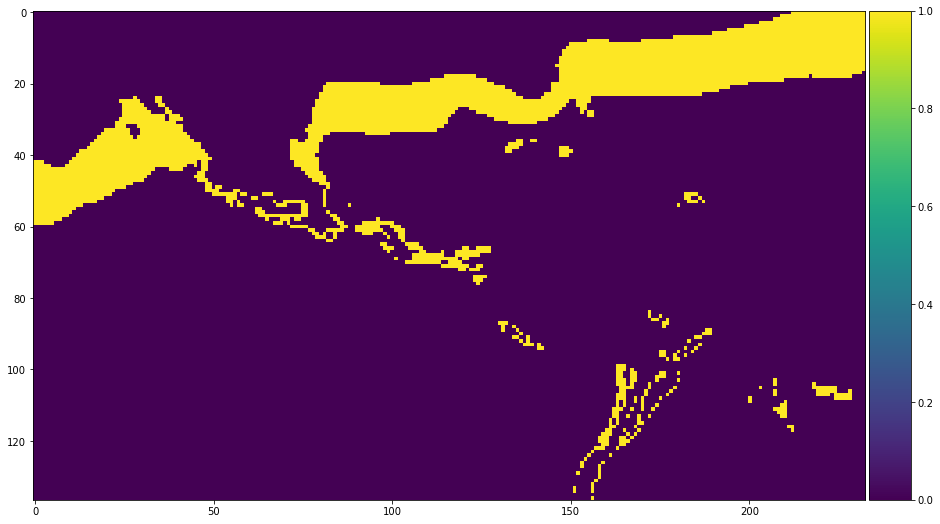

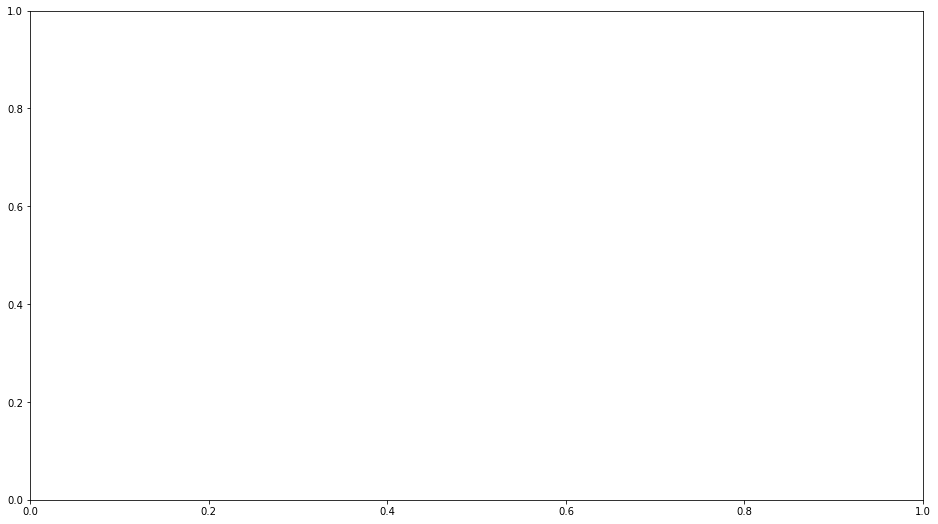

In [134]:
# Plot data
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
im1 = ax1.imshow(t2mf_mask[0,:,:])#cclim['t2mf'][0,:,:])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

# Plot data
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
im1 = ax1.imshow(tp_mask[0,:,:])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')



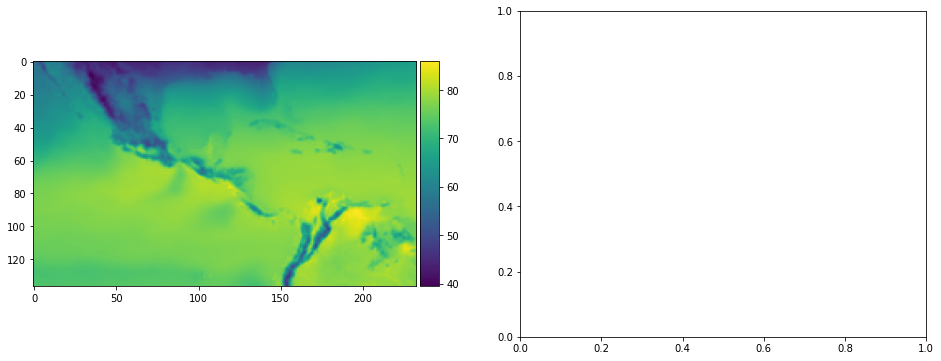

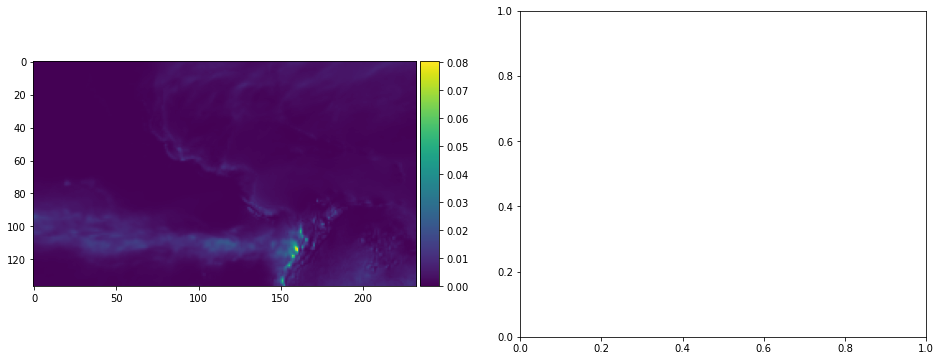

In [15]:
# Plot data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
im1 = ax1.imshow(t2mf[0,:,:])#cclim['t2mf'][0,:,:])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

# Plot data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
im1 = ax1.imshow(cclim['tp'][0,:,:])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')



In [16]:
cof_lat = [19.477585598288215, 15.951339161580043, 15.17355242498728, 4.622913389125596, 20.762395445023337, 21.325342888979133]
cof_long = [-96.97046892217435,-96.4635391253275,-92.33612361801524,-75.59423450228476, -104.85486555253753, -105.00863721756717]
#cof_names = [‘Veracruz’,‘Oaxaca’,‘Chiapas’,‘Columbia’,‘Jalisco’,‘Nayarit’]

#Oaxaca_point = cclim.sel(latitude=15.951339161580043, longitude=-96.4635391253275, method='nearest')

# Next, find the index of the grid point nearest a specific lat/lon.  

cof_farms = cclim.sel(x = (cof_lat), y = (cof_long) ,method='nearest')






In [95]:
veracruz_point = cclim.sel(y=19.477585598288215, x=-96.97046892217435, method='nearest')

oaxaca_point = cclim.sel(y=15.951339161580043, x=-96.4635391253275, method='nearest')

chiapas_point = cclim.sel(y=15.17355242498728, x=-92.33612361801524, method='nearest')

colombia_point = cclim.sel(y=4.622913389125596, x=-75.59423450228476, method='nearest')

jalisco_point = cclim.sel(y=20.762395445023337, x=-104.85486555253753, method='nearest')

nayarit_point = cclim.sel(y=21.325342888979133, x=-105.00863721756717, method='nearest')



In [103]:
#print(oaxaca_point['t2m'].mean)
oax_temps = oaxaca_point['t2m'].mean

#print(veracruz_point['t2m'].mean)
veracruz_temps = veracruz_point['t2m'].mean()
chiapas_temps = chiapas_point['t2m'].mean
colombia_temps = colombia_point['t2m'].mean
jalisco_temps = jalisco_point['t2m'].mean
nayarit_temps = nayarit_point['t2m'].mean
print(oax_temps)
print(veracruz_temps)


<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray 't2m' (time: 132)>
array([292.0479 , 292.36053, 293.1613 , 294.3557 , 294.63925, 293.87326,
       293.7341 , 293.73096, 293.61362, 292.8949 , 292.51215, 291.60596,
       292.04684, 292.89386, 293.78082, 293.38147, 294.40347, 293.55026,
       293.81873, 293.66293, 293.71902, 293.46094, 292.22498, 291.86667,
       292.1341 , 292.89178, 293.95065, 294.74   , 294.3126 , 294.10226,
       293.84106, 293.74915, 293.32748, 293.74188, 293.05588, 292.19278,
       291.4216 , 292.75623, 293.9418 , 294.9155 , 294.30222, 294.00308,
       294.55667, 293.7476 , 293.5653 , 293.09015, 292.64148, 291.822  ,
       292.10812, 292.1118 , 293.23035, 294.46268, 294.1433 , 294.2046 ,
       294.00464, 294.0815 , 293.99686, 294.0166 , 293.91898, 292.938  ,
       292.21875, 292.7417 , 293.7211 , 295.22656, 295.12167, 294.01245,
       293.9901 , 294.11578, 293.52844, 293.70242, 292.79413, 292.77597,
       291.

In [97]:
veracruz_temps = veracruz_point['t2m'].mean
print(veracruz_temps)

<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray 't2m' (time: 132)>
array([286.77432, 287.16537, 289.17664, 292.1819 , 292.41452, 291.22842,
       291.1464 , 291.7524 , 290.88516, 288.88687, 287.8675 , 286.2249 ,
       286.52768, 287.4406 , 288.7415 , 289.63156, 291.13547, 291.35876,
       290.4474 , 291.15884, 290.9397 , 289.576  , 287.04904, 287.05008,
       286.281  , 288.41483, 287.32532, 291.00772, 291.03525, 291.47302,
       291.1848 , 290.87012, 291.32138, 290.5663 , 287.96564, 287.03452,
       284.73035, 288.13907, 289.3828 , 290.65564, 290.30978, 291.68283,
       290.9257 , 291.4995 , 291.21753, 290.1784 , 287.12177, 286.4451 ,
       285.1593 , 285.88736, 287.5216 , 291.10535, 290.95996, 291.05655,
       291.13962, 291.48184, 291.3053 , 290.83896, 289.7998 , 288.1313 ,
       285.2559 , 285.56592, 289.40256, 290.90283, 292.24316, 291.5634 ,
       291.4803 , 291.79187, 291.2627 , 290.28485, 288.43457, 288.33276,
       287.

In [75]:
Oax_10yr_mean = np.array([[298.02823, 297.7338 , 298.28998, 297.887  , 298.385  , 299.1193 ,
       299.12866, 300.47314, 300.2836 , 299.79337, 299.3265 , 298.9734 ,
       297.8127 , 297.48557, 297.7068 , 298.28583, 298.69815, 298.6322 ,
       298.20532, 299.41895, 300.58426, 300.5178 , 300.50586, 298.7885 ,
       298.82175, 297.968  , 298.39383, 298.58804, 298.37305, 299.05334,
       298.14197, 298.79214, 299.3665 , 300.20673, 299.01648, 299.6791 ,
       298.8456 , 297.91452, 298.39694, 298.4717 , 298.56155, 298.67477,
       298.4764 , 299.85516, 301.9656 , 299.40283, 299.41064, 299.34155,
       297.8953 , 298.7937 , 298.2209 , 298.65607, 298.48315, 298.6753 ,
       299.0144 , 300.93478, 303.11795, 303.16315, 301.87006, 301.98898,
       302.07053, 299.51086, 299.08035, 298.9417 , 299.16656, 298.86795,
       299.00558, 299.99484, 299.30417, 300.43106, 300.30954, 298.4167 ,
       298.09625, 298.19806, 298.08432, 298.28687, 299.52176, 299.1437 ,
       299.13437, 301.3658 , 300.8164 , 300.04004, 300.1496 , 298.882  ,
       298.116  , 298.6566 , 298.9365 , 297.8958 , 298.10303, 298.6109 ,
       298.748  , 300.05768, 300.7951 , 302.63138, 300.30072, 298.1212 ,
       298.36838, 298.23077, 299.49008, 298.8882 , 298.46912, 299.031  ,
       299.4963 , 300.33084, 301.5959 , 299.4371 , 299.52383, 298.74384,
       299.33948, 299.4475 , 299.75235, 298.52417, 298.68152, 298.8934 ,
       300.0499 , 301.29572, 300.9592 , 300.4425 , 299.3909 , 298.71527,
       297.92697, 298.32217, 298.04175, 298.54858, 298.89288, 298.60934,
       298.6057 , 299.3156 , 299.37793, 299.40076, 298.60416, 298.40887]])

np.mean((Oax_10yr_mean)- 273.15) * 9/5 + 32

ver_10yr_mean = np.array([[]])

In [89]:
oax_temps

<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray 't2m' (time: 132)>
array([292.0479 , 292.36053, 293.1613 , 294.3557 , 294.63925, 293.87326,
       293.7341 , 293.73096, 293.61362, 292.8949 , 292.51215, 291.60596,
       292.04684, 292.89386, 293.78082, 293.38147, 294.40347, 293.55026,
       293.81873, 293.66293, 293.71902, 293.46094, 292.22498, 291.86667,
       292.1341 , 292.89178, 293.95065, 294.74   , 294.3126 , 294.10226,
       293.84106, 293.74915, 293.32748, 293.74188, 293.05588, 292.19278,
       291.4216 , 292.75623, 293.9418 , 294.9155 , 294.30222, 294.00308,
       294.55667, 293.7476 , 293.5653 , 293.09015, 292.64148, 291.822  ,
       292.10812, 292.1118 , 293.23035, 294.46268, 294.1433 , 294.2046 ,
       294.00464, 294.0815 , 293.99686, 294.0166 , 293.91898, 292.938  ,
       292.21875, 292.7417 , 293.7211 , 295.22656, 295.12167, 294.01245,
       293.9901 , 294.11578, 293.52844, 293.70242, 292.79413, 292.77597,
       291.

In [22]:
len(Oax_10yr_mean)

1

In [90]:
Oax_10yr_mean = np.array([292.0479 , 292.36053, 293.1613 , 294.3557 , 294.63925, 293.87326,
       293.7341 , 293.73096, 293.61362, 292.8949 , 292.51215, 291.60596,
       292.04684, 292.89386, 293.78082, 293.38147, 294.40347, 293.55026,
       293.81873, 293.66293, 293.71902, 293.46094, 292.22498, 291.86667,
       292.1341 , 292.89178, 293.95065, 294.74   , 294.3126 , 294.10226,
       293.84106, 293.74915, 293.32748, 293.74188, 293.05588, 292.19278,
       291.4216 , 292.75623, 293.9418 , 294.9155 , 294.30222, 294.00308,
       294.55667, 293.7476 , 293.5653 , 293.09015, 292.64148, 291.822  ,
       292.10812, 292.1118 , 293.23035, 294.46268, 294.1433 , 294.2046 ,
       294.00464, 294.0815 , 293.99686, 294.0166 , 293.91898, 292.938  ,
       292.21875, 292.7417 , 293.7211 , 295.22656, 295.12167, 294.01245,
       293.9901 , 294.11578, 293.52844, 293.70242, 292.79413, 292.77597,
       291.52808, 292.427  , 293.47495, 294.00412, 294.3557 , 293.73514,
       293.79486, 293.76056, 293.71643, 293.69046, 292.48358, 291.97156,
       291.58884, 292.5376 , 293.745  , 293.89404, 294.56393, 293.79434,
       294.2752 , 293.78394, 294.0685 , 293.63748, 293.38095, 292.199  ,
       292.26495, 293.01172, 294.041  , 294.52707, 294.9046 , 294.97678,
       294.19522, 294.1921 , 294.0841 , 293.8182 , 293.59232, 292.5776 ,
       293.10938, 293.63855, 294.4746 , 295.32318, 295.04898, 294.4871 ,
       294.20044, 294.1106 , 294.13135, 293.76266, 293.31656, 291.69528,
       292.091  , 292.1232 , 293.47702, 294.52914, 294.62106, 293.62296,
       294.47668, 293.9714 , 293.8447 , 293.93973, 292.19174, 292.21356])
    
np.mean((Oax_10yr_mean)- 273.15) * 9/5 + 32

68.63418854545459

In [91]:
test_df = pd.DataFrame({"a": Oax_10yr_mean, "b": range(0, len(Oax_10yr_mean))})

In [92]:
test_df_f = ((test_df)- 273.15) * 9/5 + 32

<AxesSubplot:>

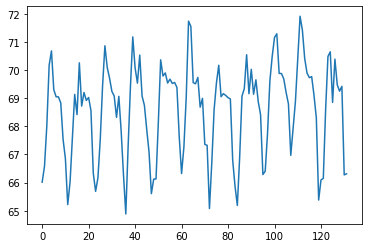

In [93]:
test_df_f.iloc[:,0].plot()

61.89193809090913

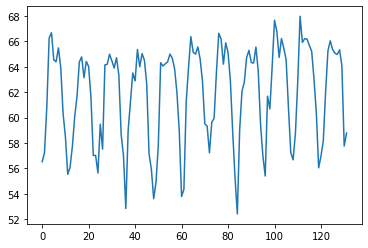

In [101]:
#print(veracruz_temps)
vera_10yr_mean = np.array([286.77432, 287.16537, 289.17664, 292.1819 , 292.41452, 291.22842,
       291.1464 , 291.7524 , 290.88516, 288.88687, 287.8675 , 286.2249 ,
       286.52768, 287.4406 , 288.7415 , 289.63156, 291.13547, 291.35876,
       290.4474 , 291.15884, 290.9397 , 289.576  , 287.04904, 287.05008,
       286.281  , 288.41483, 287.32532, 291.00772, 291.03525, 291.47302,
       291.1848 , 290.87012, 291.32138, 290.5663 , 287.96564, 287.03452,
       284.73035, 288.13907, 289.3828 , 290.65564, 290.30978, 291.68283,
       290.9257 , 291.4995 , 291.21753, 290.1784 , 287.12177, 286.4451 ,
       285.1593 , 285.88736, 287.5216 , 291.10535, 290.95996, 291.05655,
       291.13962, 291.48184, 291.3053 , 290.83896, 289.7998 , 288.1313 ,
       285.2559 , 285.56592, 289.40256, 290.90283, 292.24316, 291.5634 ,
       291.4803 , 291.79187, 291.2627 , 290.28485, 288.43457, 288.33276,
       287.16278, 288.49896, 288.67603, 290.66965, 292.39273, 292.1398 ,
       291.04095, 291.97156, 291.54834, 290.33105, 288.08298, 286.09302,
       284.493  , 288.1666 , 289.85434, 290.25732, 291.3318 , 291.64597,
       291.11108, 291.09082, 291.78928, 290.733  , 288.3904 , 287.0236 ,
       286.15012, 289.6409 , 289.08423, 290.95474, 292.96136, 292.47476,
       291.338  , 292.1611 , 291.73633, 291.23987, 289.14496, 287.1773 ,
       286.8569 , 288.0134 , 290.2755 , 293.13583, 291.99234, 292.15332,
       292.1398 , 291.8547 , 291.60803, 290.3835 , 288.9201 , 286.51   ,
       287.02048, 287.6935 , 289.8367 , 291.63037, 292.06088, 291.68335,
       291.51978, 291.46368, 291.66672, 290.9693 , 287.46136, 288.03003])
vera_df = pd.DataFrame({"a": vera_10yr_mean, "b": range(0, len(vera_10yr_mean))})
vera_df_f = ((vera_df)- 273.15) * 9/5 + 32
vera_df_f.iloc[:,0].plot()
np.mean((vera_10yr_mean)- 273.15) * 9/5 + 32

66.45679250000003

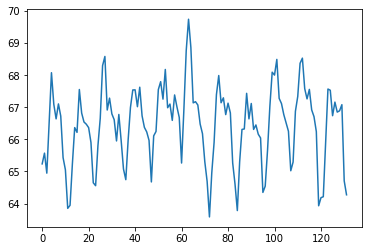

In [117]:
#print(chiapas_temps)
chia_10yr_mean = np.array([291.6122 , 291.79813, 291.45224, 292.3325 , 293.18777, 292.6446 ,
       292.39014, 292.64874, 292.4379 , 291.72073, 291.5099 , 290.84415,
       290.8966 , 291.60855, 292.23953, 292.15695, 292.8975 , 292.48984,
       292.33612, 292.2977 , 292.2385 , 291.98245, 291.28555, 291.2357 ,
       291.92535, 292.40155, 293.3098 , 293.46872, 292.5433 , 292.74844,
       292.4758 , 292.3761 , 292.00894, 292.46646, 292.01465, 291.5229 ,
       291.33957, 292.0235 , 292.58798, 292.8897 , 292.89178, 292.60043,
       292.93747, 292.44308, 292.24316, 292.16473, 292.0183 , 291.30063,
       292.0967 , 292.17255, 292.89645, 293.03302, 292.7313 , 293.24387,
       292.5828 , 292.64615, 292.36417, 292.8035 , 292.59836, 292.41452,
       291.62726, 292.5558 , 293.56842, 294.11163, 293.62555, 292.6669 ,
       292.68716, 292.62952, 292.3003 , 292.1341 , 291.6496 , 291.30945,
       290.69614, 291.45798, 291.98456, 292.8087 , 293.13898, 292.66898,
       292.75363, 292.46387, 292.6617 , 292.49295, 291.62778, 291.26477,
       290.80573, 291.64908, 292.20786, 292.21616, 292.83154, 292.39014,
       292.656  , 292.20786, 292.28522, 292.1258 , 292.06036, 291.1194 ,
       291.2279 , 291.84796, 292.60562, 293.1966 , 293.14676, 293.41782,
       292.7443 , 292.65497, 292.46335, 292.31793, 292.17618, 291.4938 ,
       291.6444 , 292.5215 , 292.77753, 293.3503 , 293.43964, 292.91306,
       292.73547, 292.89957, 292.54538, 292.42856, 292.16992, 290.8888 ,
       291.0285 , 291.0451 , 291.99493, 292.9058 , 292.885  , 292.44516,
       292.6799 , 292.50696, 292.52982, 292.63522, 291.3188 , 291.07834])
chia_df = pd.DataFrame({"a": chia_10yr_mean, "b": range(0, len(chia_10yr_mean))})
chia_df_f = ((chia_df)- 273.15) * 9/5 + 32
chia_df_f.iloc[:,0].plot()
np.mean((chia_10yr_mean)- 273.15) * 9/5 + 32

<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray 't2m' (time: 132)>
array([285.93463, 286.00888, 286.05353, 286.17038, 286.81485, 286.63464,
       286.20102, 286.39108, 286.19583, 285.81882, 286.06445, 286.28568,
       286.02185, 285.94864, 285.97617, 286.1273 , 286.56143, 286.45236,
       286.26385, 286.31528, 286.33813, 286.01147, 286.3402 , 286.15533,
       286.75357, 286.1496 , 286.62012, 286.7302 , 286.3402 , 286.6684 ,
       286.09924, 286.18442, 286.2218 , 286.09354, 286.01874, 286.1657 ,
       286.16986, 285.90244, 286.36563, 286.53027, 286.48352, 286.7977 ,
       286.74213, 286.34955, 286.3973 , 286.18805, 286.483  , 286.36926,
       286.29398, 286.45547, 286.51157, 286.90417, 286.8756 , 286.9665 ,
       286.65698, 287.13058, 287.29364, 286.47366, 286.698  , 286.97687,
       287.26404, 287.599  , 287.47488, 287.26974, 287.16278, 286.65335,
       286.17764, 286.65283, 286.37448, 286.5209 , 286.38382, 286.13144,
       286.

55.969802272727314

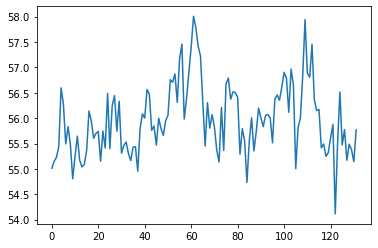

In [106]:
#print(colombia_temps)
col_10yr_mean = np.array([285.93463, 286.00888, 286.05353, 286.17038, 286.81485, 286.63464,
       286.20102, 286.39108, 286.19583, 285.81882, 286.06445, 286.28568,
       286.02185, 285.94864, 285.97617, 286.1273 , 286.56143, 286.45236,
       286.26385, 286.31528, 286.33813, 286.01147, 286.3402 , 286.15533,
       286.75357, 286.1496 , 286.62012, 286.7302 , 286.3402 , 286.6684 ,
       286.09924, 286.18442, 286.2218 , 286.09354, 286.01874, 286.1657 ,
       286.16986, 285.90244, 286.36563, 286.53027, 286.48352, 286.7977 ,
       286.74213, 286.34955, 286.3973 , 286.18805, 286.483  , 286.36926,
       286.29398, 286.45547, 286.51157, 286.90417, 286.8756 , 286.9665 ,
       286.65698, 287.13058, 287.29364, 286.47366, 286.698  , 286.97687,
       287.26404, 287.599  , 287.47488, 287.26974, 287.16278, 286.65335,
       286.17764, 286.65283, 286.37448, 286.5209 , 286.38382, 286.13144,
       286.00266, 286.59882, 286.12936, 286.85742, 286.92233, 286.69022,
       286.7712 , 286.7624 , 286.71252, 286.08887, 286.36823, 286.23166,
       285.7804 , 286.23685, 286.48715, 286.1247 , 286.3355 , 286.5931 ,
       286.4882 , 286.38953, 286.51364, 286.52402, 286.48456, 286.21295,
       286.69073, 286.73642, 286.6798 , 286.82367, 286.98465, 286.91974,
       286.54688, 287.02048, 286.84393, 285.9294 , 286.37915, 286.4856 ,
       286.94727, 287.56265, 286.97687, 286.93063, 287.29312, 286.6845 ,
       286.56558, 286.57907, 286.15845, 286.19998, 286.06445, 286.10547,
       286.26852, 286.41394, 285.43454, 286.20465, 286.76965, 286.1896 ,
       286.35785, 286.02237, 286.1979 , 286.13922, 286.0063 , 286.35422])
col_df = pd.DataFrame({"a": col_10yr_mean, "b": range(0, len(col_10yr_mean))})
col_df_f = ((col_df)- 273.15) * 9/5 + 32
col_df_f.iloc[:,0].plot()
np.mean((col_10yr_mean)- 273.15) * 9/5 + 32

67.7652378636364

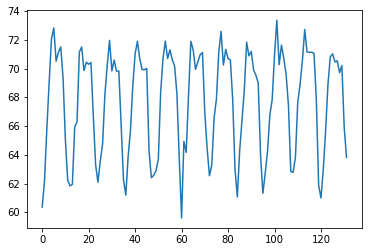

In [119]:
#print(jalisco_temps)
jal_10yr_mean = np.array([288.90714, 289.9037 , 291.91495, 293.71487, 295.399  , 295.83417,
       294.54837, 294.8932 , 295.09985, 293.88104, 291.4907 , 289.93796,
       289.72504, 289.7884 , 291.98767, 292.20734, 294.8994 , 295.09518,
       294.18588, 294.51044, 294.42996, 294.4959 , 292.4535 , 290.54813,
       289.86682, 290.68265, 291.34113, 293.25787, 294.38113, 295.35223,
       294.17136, 294.58887, 294.16147, 294.1677 , 292.08322, 289.96808,
       289.3688 , 290.86182, 291.86148, 293.5892 , 294.8236 , 295.31744,
       294.6465 , 294.22638, 294.21393, 294.2721 , 291.07108, 290.04285,
       290.1358 , 290.31082, 290.7595 , 293.3498 , 294.64548, 295.3221 ,
       294.64963, 294.9877 , 294.60443, 294.35623, 293.28592, 290.80106,
       288.48856, 291.44446, 291.01968, 293.24802, 295.31537, 294.9851 ,
       294.2342 , 294.51044, 294.80023, 294.88226, 292.5459 , 291.17444,
       290.11972, 290.53204, 292.34805, 293.08185, 294.88123, 295.7002 ,
       294.40192, 295.00482, 294.64807, 294.59665, 293.07144, 290.3664 ,
       289.29608, 291.08667, 292.2312 , 293.42355, 295.2811 , 294.75348,
       294.92538, 294.20615, 294.00204, 293.7019 , 290.9044 , 289.43942,
       290.2163 , 291.0664 , 292.47476, 293.06418, 294.7696 , 296.13068,
       294.4123 , 295.16895, 294.65637, 294.03113, 292.84814, 290.2864 ,
       290.25162, 290.82803, 292.965  , 293.64166, 294.56808, 295.77237,
       294.91135, 294.88956, 294.8932 , 294.8485 , 293.059  , 289.73853,
       289.26077, 290.37677, 291.8677 , 293.64062, 294.71298, 294.8319 ,
       294.52188, 294.55978, 294.10226, 294.37958, 291.97882, 290.82855])
jal_df = pd.DataFrame({"a": jal_10yr_mean, "b": range(0, len(jal_10yr_mean))})
jal_df_f = ((jal_df)- 273.15) * 9/5 + 32
jal_df_f.iloc[:,0].plot()
np.mean((jal_10yr_mean)- 273.15) * 9/5 + 32

<AxesSubplot:>

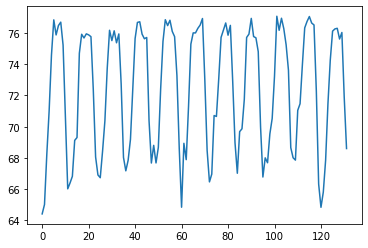

In [121]:
#print(nayarit_temps)
naya_10yr_mean = np.array([291.16092, 291.4933 , 293.28436, 294.8262 , 296.8032 , 298.06042,
       297.52502, 297.8579 , 297.9789 , 297.16412, 294.633  , 292.0531 ,
       292.26184, 292.4971 , 293.77512, 293.8774 , 296.87018, 297.5484 ,
       297.4165 , 297.56345, 297.52762, 297.4627 , 295.5823 , 293.18466,
       292.54645, 292.44827, 293.3955 , 294.47253, 296.3301 , 297.69016,
       297.32355, 297.67096, 297.24512, 297.56033, 295.78015, 293.1696 ,
       292.69287, 293.06677, 293.81094, 295.61243, 297.39572, 297.96954,
       297.9924 , 297.55255, 297.3895 , 297.43414, 294.47513, 292.9707 ,
       293.59854, 292.9733 , 293.5274 , 295.6114 , 297.29395, 298.06613,
       297.85635, 298.04642, 297.64914, 297.46375, 296.08084, 293.49054,
       291.39877, 293.67126, 293.09015, 294.98666, 297.19788, 297.59668,
       297.5972 , 297.75873, 297.87607, 298.10873, 295.9406 , 293.41678,
       292.29977, 292.57706, 294.65845, 294.62677, 295.9728 , 297.43674,
       297.6912 , 297.94983, 297.51517, 297.86414, 295.88974, 293.69046,
       292.60666, 294.08618, 294.18796, 295.23386, 297.43518, 297.5541 ,
       298.11288, 297.4679 , 297.4222 , 296.93042, 294.25598, 292.4727 ,
       293.15402, 292.98056, 294.00412, 294.55615, 296.06058, 298.1892 ,
       297.68964, 298.11807, 297.74625, 297.17346, 296.27402, 293.51703,
       293.15817, 293.07404, 294.84384, 295.0791 , 296.4646 , 297.77585,
       298.00278, 298.17883, 297.94775, 297.8797 , 295.5314 , 292.2229 ,
       291.39566, 291.93573, 293.073  , 295.07962, 296.62714, 297.66003,
       297.73846, 297.7608 , 297.3796 , 297.61176, 295.31693, 293.48483])
naya_df = pd.DataFrame({"a": naya_10yr_mean, "b": range(0, len(naya_10yr_mean))})
naya_df_f = ((naya_df)- 273.15) * 9/5 + 32
naya_df_f.iloc[:,0].plot()


In [137]:
#Time for precipitation
oax_rain = oaxaca_point['tp'].mean
print(oax_rain)

<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray 'tp' (time: 132)>
array([0.000468, 0.00095 , 0.001251, 0.005136, 0.007781, 0.022494, 0.037149,
       0.035803, 0.030209, 0.023334, 0.002857, 0.000561, 0.000775, 0.001513,
       0.00185 , 0.003803, 0.012207, 0.02267 , 0.018217, 0.018685, 0.02665 ,
       0.015449, 0.000813, 0.002528, 0.00047 , 0.000521, 0.000585, 0.002861,
       0.014174, 0.028692, 0.015667, 0.021036, 0.042626, 0.015199, 0.006607,
       0.001602, 0.000605, 0.000876, 0.0019  , 0.004269, 0.013507, 0.029797,
       0.015151, 0.021026, 0.034476, 0.021022, 0.005314, 0.00065 , 0.000309,
       0.001001, 0.00805 , 0.002883, 0.017608, 0.019317, 0.01687 , 0.014227,
       0.018217, 0.020757, 0.013985, 0.000529, 0.001547, 0.00095 , 0.002171,
       0.006591, 0.011907, 0.02435 , 0.021524, 0.023862, 0.021798, 0.010051,
       0.003744, 0.000972, 0.000339, 0.000809, 0.001067, 0.002354, 0.011181,
       0.037952, 0.020666, 0.022169, 0.03